In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import prange, njit
from tqdm import trange

In [2]:
total_time = 600
nx = 30
R1 = 5*nx//60
R2 = 10*nx//60
dx = 1.0
D1 = 1.
D2 = 0.01
C = 0.1
p1=100
p2=100
th1 = 43
th2 = 77
points = np.array([(20*nx//60, 20*nx//60),(20*nx//60,40*nx//60),(40*nx//60,20*nx//60),(40*nx//60,40*nx//60)])
q0 = lambda t: 0
q1 = lambda t: p1 * (np.sin(2*t*np.pi/th1) + 1)
q2 = lambda t: p2 * (np.sin(2*t*np.pi/th2) + 1)

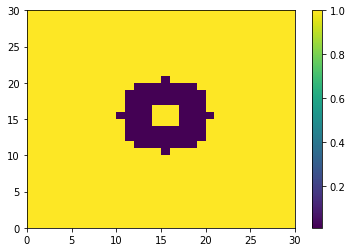

In [3]:
dt = C * dx**2 / D1
it = int(total_time/dt)+1
D = np.full((nx,nx), D1)
for i in range(nx):
    for j in range(nx):
        if R1**2 <= (nx//2 - i*dx)**2 + (nx//2 - j*dx)**2 <= R2**2 :
            D[i,j] = D2
plt.pcolormesh(D)
plt.colorbar()

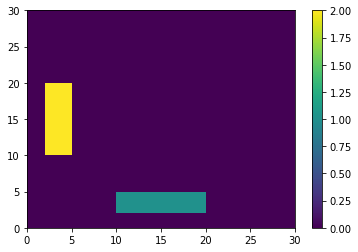

In [4]:
H = np.zeros((nx,nx))
heat1_x1, heat1_x2 = (20*nx)//60, (40*nx)//60
heat1_y1, heat1_y2 = (5*nx)//60, (10*nx)//60
heat2_y1, heat2_y2 = heat1_x1, heat1_x2
heat2_x1, heat2_x2 = heat1_y1, heat1_y2

H[heat1_y1:heat1_y2, heat1_x1:heat1_x2] = 1
H[heat2_y1:heat2_y2, heat2_x1:heat2_x2] = 2

plt.pcolormesh(H)
plt.colorbar()

In [20]:
T = np.zeros((2, nx, nx))

# граничные условия
T[:, :, 0] = 0.0
T[:, :, -1] = 0.0
T[:, 0, :] = 0.0
T[:, -1, :] = 0.0

In [6]:
def add_heat(T: np. ndarray, 
                x1: int,
                x2: int,
                y1: int,
                y2: int,
                it: int,
                dt: float, q): # q - heat function
    T[:, y1:y2, x1:x2] += q(dt*it) * dt

In [7]:
def diffuse_step(
    it: int,
    T: np.ndarray,
    dx: float,
    dt: float,
    D: np.ndarray,
    H: np.ndarray,
    points: np.array
):
    prev = it % 2
    cur  = prev - 1
    alpha = dt / dx**2
    
    T[cur, 1:-1, 1:-1] = T[prev, 1:-1, 1:-1] + alpha * D[1:-1, 1:-1] * (
        T[prev, 1:-1, 0:-2] + 
        T[prev, 1:-1, 2:  ] + 
        T[prev, 0:-2, 1:-1] + 
        T[prev, 2:,   1:-1] -
        4 * T[prev, 1:-1, 1:-1]
    )
            
    for i in range(4):
        records[i][it] = T[cur,points[i][0],points[i][1]]

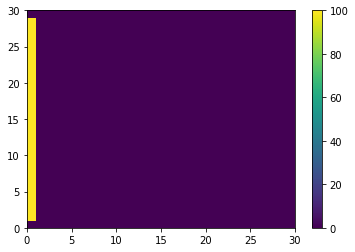

In [8]:
plt.pcolormesh(T[0])
plt.colorbar()

In [18]:
records = np.zeros((4,it))
for i in trange(it):
    diffuse_step(i, T, dx, dt, D, H, points)
    add_heat(T,heat1_x1,heat1_x2,heat1_y1,heat1_y2, dt, it, q1)
    add_heat(T,heat2_x1,heat2_x2,heat2_y1,heat2_y2, dt, it, q2)

100%|████████████████████████████████████████████████████████████████████████████| 6001/6001 [00:00<00:00, 9336.75it/s]


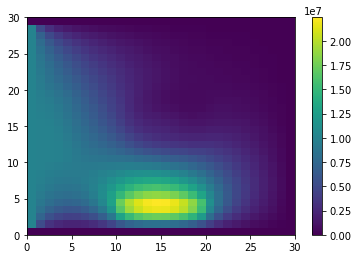

In [19]:
np.savetxt("mesh.txt", T[0])
np.savetxt("records.txt", records)
plt.pcolormesh(T[0])
plt.colorbar()

<function matplotlib.pyplot.show(close=None, block=None)>

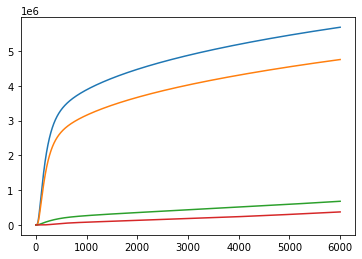

In [11]:
plt.plot(records[0])
plt.plot(records[1])
plt.plot(records[2])
plt.plot(records[3])
plt.show

In [12]:
H = np.full((10,10), 10)
print(H)
H[:,[0,-2]] = 0
H

[[10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10]]


array([[ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10],
       [ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10],
       [ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10],
       [ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10],
       [ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10],
       [ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10],
       [ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10],
       [ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10],
       [ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10],
       [ 0, 10, 10, 10, 10, 10, 10, 10,  0, 10]])

In [13]:
a = np.array([[3,0],[0,1]])
v = np.array([1,1])
np.dot(a,v)

array([3, 1])